<a href="https://colab.research.google.com/github/guten-morgen3776/NN-practice/blob/main/%E7%94%BB%E5%83%8F%E5%AD%A6%E7%BF%92_%E7%B0%A1%E6%98%93%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_tr, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_tr = (x_tr.astype("float32") / 255.0)
x_te = (x_te.astype("float32") / 255.0)

x_tr, x_val = x_tr[:-5000], x_tr[-5000:]
y_tr, y_val = y_tr[:-5000], y_tr[-5000:]

In [ ]:
x_tr.shape

(55000, 28, 28)

In [ ]:
BATCH = 128
#バッチとは一度の更新でまとめて学習に使うサンプル
#ミニバッチとはバッチサイズがデータ全体より小さい
ds_tr = tf.data.Dataset.from_tensor_slices((x_tr, y_tr)).shuffle(10000).batch(BATCH)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH)
ds_te = tf.data.Dataset.from_tensor_slices((x_te, y_te)).batch(BATCH)




In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(), #784次元に平坦化
    tf.keras.layers.Dense(10), #活性なし=logits
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    #損失関数でlogit入力→softmaxを適用している
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [ ]:
history = model.fit(ds_tr, validation_data=ds_val, epochs=20, verbose=1)
test_loss, test_acc = model.evaluate(ds_te, verbose=0)
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

Epoch 1/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7798 - loss: 0.8705 - val_accuracy: 0.9164 - val_loss: 0.3311
Epoch 2/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8918 - loss: 0.3955 - val_accuracy: 0.9258 - val_loss: 0.2893
Epoch 3/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.3545 - val_accuracy: 0.9306 - val_loss: 0.2715
Epoch 4/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.3360 - val_accuracy: 0.9300 - val_loss: 0.2602
Epoch 5/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9103 - loss: 0.3216 - val_accuracy: 0.9330 - val_loss: 0.2544
Epoch 6/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.3149 - val_accuracy: 0.9338 - val_loss: 0.2488
Epoch 7/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.3094 - val_accuracy: 0.9338 - val_loss: 0.2462
Epoch 8/20
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9169 - loss: 0.2989 - val_accuracy: 0.

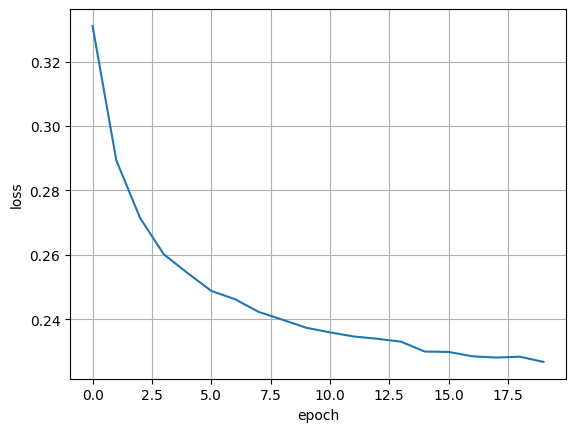

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

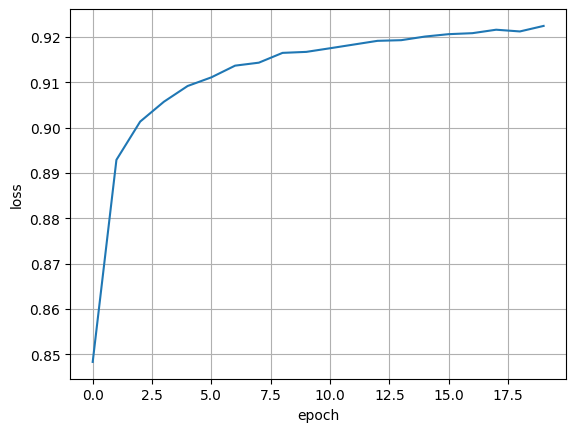

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10), #出力はlogit,softmaxは損失関数で適用
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")],
)

In [ ]:
history = model.fit(ds_tr, epochs=30, validation_data=ds_val, verbose=1)
test_loss, test_acc = model.evaluate(ds_te, verbose=0)
print(f"test_loss: {test_loss}, test_acc: {test_acc}")

Epoch 1/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8577 - loss: 0.4988 - val_accuracy: 0.9668 - val_loss: 0.1255
Epoch 2/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9676 - loss: 0.1076 - val_accuracy: 0.9754 - val_loss: 0.0889
Epoch 3/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9793 - loss: 0.0668 - val_accuracy: 0.9732 - val_loss: 0.0902
Epoch 4/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9848 - loss: 0.0488 - val_accuracy: 0.9764 - val_loss: 0.0831
Epoch 5/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9796 - val_loss: 0.0724
Epoch 6/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9919 - loss: 0.0255 - val_accuracy: 0.9812 - val_loss: 0.0805
Epoch 7/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9828 - val_loss: 0.0754
Epoch 8/30
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9956 - loss: 0.0150 - val_accuracy:

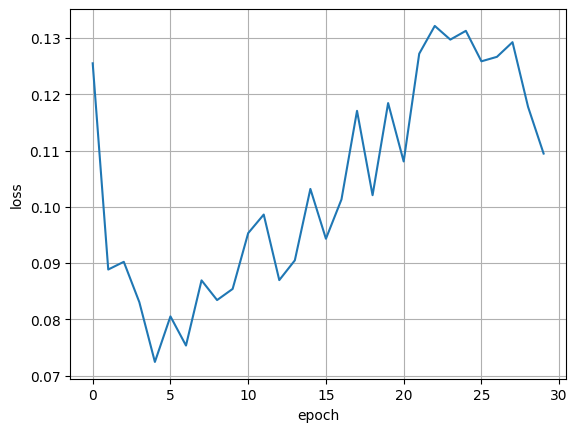

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

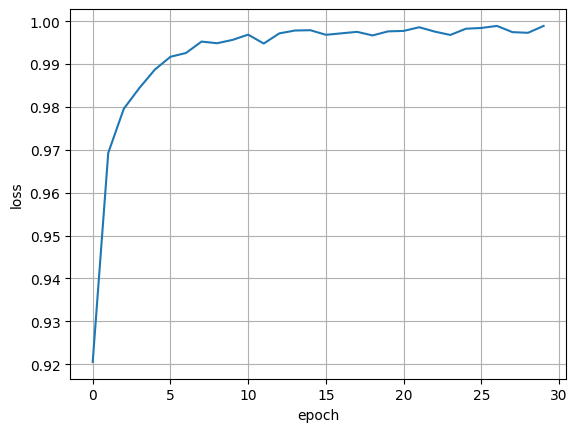

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()